In [1]:
import pandas_gbq
import pandas as pd
import os

In [2]:
# Configurando o pandas_gbq
project_id = 'perfect-physics-362502'
credentials = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')

pandas_gbq.context.credentials = credentials
pandas_gbq.context.project = "perfect-physics-362502"

In [4]:
#SQL para a população
sql_population =  '''
SELECT Country.country_area,
       Country.country_code,
       Country.country_name,
       Population.midyear_population,
       Population.year
FROM `bigquery-public-data.census_bureau_international.country_names_area` AS Country
INNER JOIN `bigquery-public-data.census_bureau_international.midyear_population` AS Population
ON Country.country_code = Population.country_code'''
df = pandas_gbq.read_gbq(sql_population, project_id=project_id)

Downloading: 100%|██████████████████| 23028/23028 [00:02<00:00, 11113.86rows/s]


In [5]:
#Sql e df para  mortalidade
sql_MLE = '''SELECT * FROM `bigquery-public-data.census_bureau_international.mortality_life_expectancy`'''
df_MLE = pandas_gbq.read_gbq(sql_MLE, project_id=project_id)

Downloading: 100%|███████████████████| 15016/15016 [00:04<00:00, 3052.08rows/s]


In [6]:
#Sql e df para a expectativa de vida
sql_MLE = '''SELECT 
            MLE.country_code,
            MLE.year AS year,
            MLE.infant_mortality AS infant_mortality,
            MLE.infant_mortality_male AS infant_mortality_male,
            MLE.infant_mortality_female AS infant_mortality_female,
            MLE.life_expectancy AS life_expectancy,
            MLE.life_expectancy_male AS life_expectancy_male,
            MLE.life_expectancy_female AS life_expectancy_female,
            FROM `bigquery-public-data.census_bureau_international.mortality_life_expectancy` as MLE'''
            
df_MLE = pandas_gbq.read_gbq(sql_MLE, project_id=project_id)

Downloading: 100%|███████████████████| 15016/15016 [00:02<00:00, 5570.54rows/s]


In [9]:
#Taxa de nascimento e mortes
sql_BDGR = '''SELECT 
BDGR.country_code,
BDGR.year,
BDGR.crude_birth_rate,
BDGR.crude_death_rate,
BDGR.net_migration,
BDGR.rate_natural_increase,
BDGR.growth_rate 
FROM `bigquery-public-data.census_bureau_international.birth_death_growth_rates` AS BDGR'''
df_BDGR = pandas_gbq.read_gbq(sql_BDGR, project_id=project_id)

Downloading: 100%|███████████████████| 15019/15019 [00:02<00:00, 6864.94rows/s]


In [14]:
#Unindo os dataframes
df_merged = pd.merge(df, df_MLE, on=['country_code', 'year'], how='outer')
df_merged = pd.merge(df_merged, df_BDGR, on=['country_code', 'year'], how='outer')

In [17]:
df_merged.to_excel('df.xlsx', index=False)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df_sum = df.groupby(['year'], as_index=False).agg({'midyear_population':'sum'})

In [43]:
df_sum.year = pd.to_datetime(df_sum.year, format='%Y').dt.to_period('Y')

<AxesSubplot:xlabel='year'>

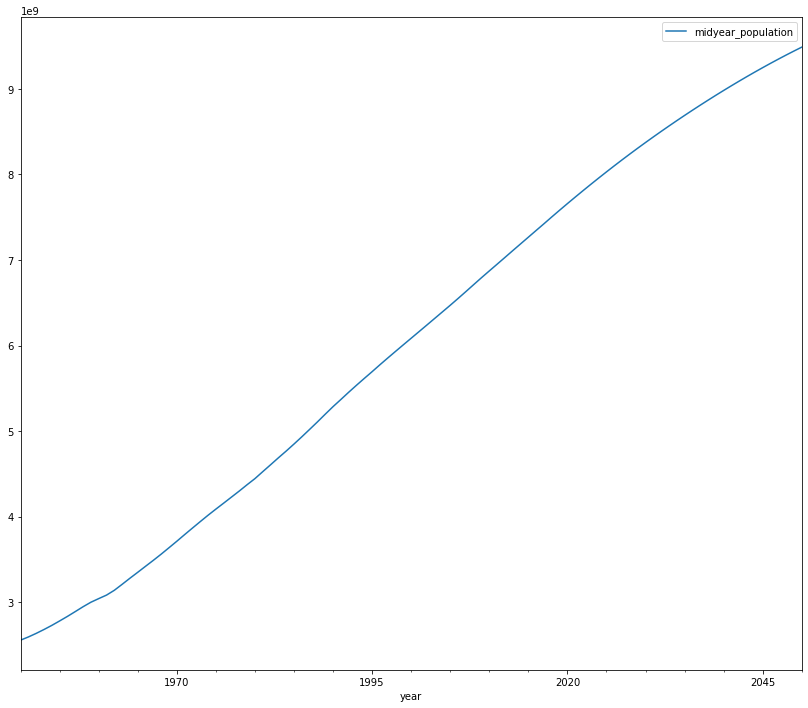

In [45]:
# plt.figure(figsize=(20,20))
df_sum.set_index('year').plot.line(figsize=(14,12))
# plt.show()